In [1]:
#import libraries to use for data manipulation
import pandas as pd #for data visualization
import matplotlib.pyplot as plt #statistical data visualization :comparisons
import seaborn as sbn #statistical comparison of data visualization - built on matplotlib
import numpy as np #for numerical and maths function on arrays

In [2]:
#open csv file with error handling

try:
    with open('diabetes.csv') as df:
        ds = pd.read_csv(df)
        print("File loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file '{df_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")
    

    

File loaded successfully!


In [3]:
ds.head() #returns 1st 5 rows in dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,0,33.6,0.627,50,1
1,1,85.0,66.0,29,0,26.6,0.351,31,0
2,8,183.0,64.0,0,0,23.3,0.672,32,1
3,1,89.0,66.0,23,94,28.1,0.167,21,0
4,0,137.0,40.0,35,168,43.1,2.288,33,1


In [7]:
ds.columns # gives us all columns in dataset

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
ds.shape #checking the dimensionality of the dataframe

(768, 9)

In [11]:
ds.duplicated().any() #checking if there is any duplicates 

False

In [13]:
ds.dtypes #checking data types in every column

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [15]:
ds['Glucose'].unique() #checking the values of a column (Glucose) using attributes of the framework

array([148.,  85., 183.,  89., 137., 116.,  78., 115., 197., 125., 110.,
       168., 139., 189., 166., 100., 118., 107., 103., 126.,  99., 196.,
       119., 143., 147.,  97., 145., 117., 109., 158.,  88.,  92., 122.,
       138., 102.,  90., 111., 180.,  nan, 106., 171., 159., 146.,  71.,
       105., 101., 176., 150.,  73., 187.,  84., 133.,  44., 141.,  95.,
       129.,  79.,   0.,  62., 131., 112., 113.,  74.,  83., 136.,  80.,
       123.,  81., 134., 142., 144.,  93., 163., 151.,  96., 155.,  76.,
       160., 124., 162., 132., 120., 173., 170., 128., 108., 154.,  57.,
       114., 156., 153., 188., 152., 104.,  87.,  75., 179., 130., 194.,
       181., 135., 184., 140., 177., 164.,  91., 165.,  86., 193., 191.,
       161., 167.,  77., 182., 157., 178.,  61.,  98., 127.,  82.,  72.,
       172.,  94., 175., 195.,  68., 186., 198., 121.,  67., 174., 199.,
        56., 169., 149.,  65., 190.])

In [17]:
ds.describe().head() # gives a summary of statistical data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,764.000000,765.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.952880,69.079739,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,32.021992,19.375463,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000


In [19]:
# pd.get_dummies(ds, columns=['Outcome'],drop_first=True) 

In [21]:
ds.iloc[0:5] #access rows and columns using index based (start from 0) - end is exclusive

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,0,33.6,0.627,50,1
1,1,85.0,66.0,29,0,26.6,0.351,31,0
2,8,183.0,64.0,0,0,23.3,0.672,32,1
3,1,89.0,66.0,23,94,28.1,0.167,21,0
4,0,137.0,40.0,35,168,43.1,2.288,33,1


In [23]:
ds.loc[0:5] #access rows using integer based value - end is inclusive

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,0,33.6,0.627,50,1
1,1,85.0,66.0,29,0,26.6,0.351,31,0
2,8,183.0,64.0,0,0,23.3,0.672,32,1
3,1,89.0,66.0,23,94,28.1,0.167,21,0
4,0,137.0,40.0,35,168,43.1,2.288,33,1
5,5,116.0,74.0,0,0,25.6,0.201,30,0


In [25]:
ds.isnull().any() #checking if there is any missing value. If missing values are there, can use the following function to handle them.

Pregnancies                 False
Glucose                      True
BloodPressure                True
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [26]:
#function to handle missing values

def handle_missing_values(ds, column, strategy='mean'):
    '''
    Dataframe with missing values can affect the quality - ensuring no missing values
    ds(dataframe) - the dataset used in ths project
    columns(str) - any column to handle 
    strategy(str) - methods used to solve missing data (mean, median or mode) carries a default value of 'mean'
    fillna() - method to handle missing values 
    
    Return:
    ds - dataframe without missing values
    '''    
    
    #check and count any missing values in the df before handling them
    count_missing_values = ds[column].isnull().sum()
    # print(f'Initially there are {count_missing_values} missing values in these columns')
    #handle the missing values
    if count_missing_values > 0:
    
        #conditional statement to chose a method to handle missing value if the above is True
        if strategy == 'mean':
            ds[column].fillna(ds[column].mean(), inplace=True)
        elif strategy == 'median':
            ds[column].fillna(ds[column].median(), inplace=True)
        elif strategy == 'mode':
            ds[column].fillna(ds[column].mode()[0], inplace=True)
            
        print(f'There are {count_missing_values} missing values on column {column}')
             
    else:
        print(f"No more missing values in column '{column}', handled!.")

    return ds
    
        

In [29]:
#helper function to apply appropriate strategy to different columns
ds = handle_missing_values(ds, 'Glucose', strategy='mean')
ds = handle_missing_values(ds, 'BloodPressure', strategy='median')

There are 4 missing values on column Glucose
There are 3 missing values on column BloodPressure


/tmp/ipykernel_17896/3503144361.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds[column].fillna(ds[column].mean(), inplace=True)
/tmp/ipykernel_17896/3503144361.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [31]:
ds.isnull().any() #repeat the method to see if the above function has worked

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [33]:
#Feature Engineering - a process of edit or create new columns and convensional naming column

In [35]:
#renaming the columns allows to claim data familiarity
ds.rename(columns = {
    'Pregnancies': 'Num_Pregnancies',
    'Glucose':'Glucose_level', 
    'BloodPressure':'BP_Measurement',
    'SkinThickness':'Skin_Fold',
    'Insulin':'Insulin_level',
    'Age':'Patient_Age',
    'BMI':'Body_Mass_Index',
    'DiabetesPedigreeFunction':'Diabetes_%', 
    'Outcome':'Diabetes_status' 
    
    }, inplace =True)

In [37]:
ds.columns #check if the above changes has been effected

Index(['Num_Pregnancies', 'Glucose_level', 'BP_Measurement', 'Skin_Fold',
       'Insulin_level', 'Body_Mass_Index', 'Diabetes_%', 'Patient_Age',
       'Diabetes_status'],
      dtype='object')

In [39]:
#Categorizing age groups can make the interpretation of data more easy and 
#visualization and accessibility to insights more clearer and informative

def categorize_age(ds):
    """
    Categorizes age into three groups: young, middle-aged, and senior.
    
    Parameters:
    ds (DataSet): The DataFrame containing the 'Patient_Age' column.
    
    Returns:
    DataFrame: The DataFrame with a new 'AgeGroup' column.
    """
    bins = [0, 25, 40, 80] #range of age-groups
    labels = ['young', 'middle-aged', 'senior']
    
    #cut() function that categorizes numerical values into ranges
    ds['Patient_Age'] = pd.cut(ds['Patient_Age'], bins=bins, labels=labels)
    return ds


In [41]:
#call function
ds = categorize_age(ds)
ds.head()

,Num_Pregnancies,Glucose_level,BP_Measurement,Skin_Fold,Insulin_level,Body_Mass_Index,Diabetes_%,Patient_Age,Diabetes_status
0,6,148.0,72.0,35,0,33.6,0.627,senior,1
1,1,85.0,66.0,29,0,26.6,0.351,middle-aged,0
2,8,183.0,64.0,0,0,23.3,0.672,middle-aged,1
3,1,89.0,66.0,23,94,28.1,0.167,young,0
4,0,137.0,40.0,35,168,43.1,2.288,middle-aged,1


In [43]:
#removing clolumns in dataframe to improve relevence in analysis.
#Some columns may not be neccessary to the broader interpretation of the data for further usage
#reason for dropping the selected columns is given in ReadMe file

#method to delete specific column
ds.drop(['Glucose_level','Skin_Fold', 'Insulin_level','Num_Pregnancies'], axis=1, inplace=True)
ds.head()

,BP_Measurement,Body_Mass_Index,Diabetes_%,Patient_Age,Diabetes_status
0,72.0,33.6,0.627,senior,1
1,66.0,26.6,0.351,middle-aged,0
2,64.0,23.3,0.672,middle-aged,1
3,66.0,28.1,0.167,young,0
4,40.0,43.1,2.288,middle-aged,1


In [95]:
#function to visualize the columns data in order to get more insights on how the data is affecting the outcome
#allows user to analyse different columns
def plot_distribution(ds, column):
    """
    Plots the distribution of a given column.
    
    Parameters:
    ds: The DataFrame containing the data.
    column (str): The column to visualize.
    
    Returns:
    None
    """
    #can manipulate naming of labels and color
    #
    sbn.histplot(ds[column], kde=True, color='green', bins=30) #kde for distribution under curve (Kernel Density Estimation)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Frequency')
    plt.ylabel('Value')
    plt.show()


/home/abitondev/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


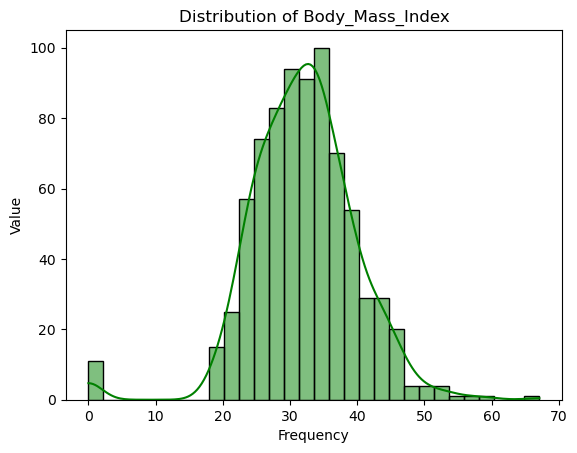

/home/abitondev/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


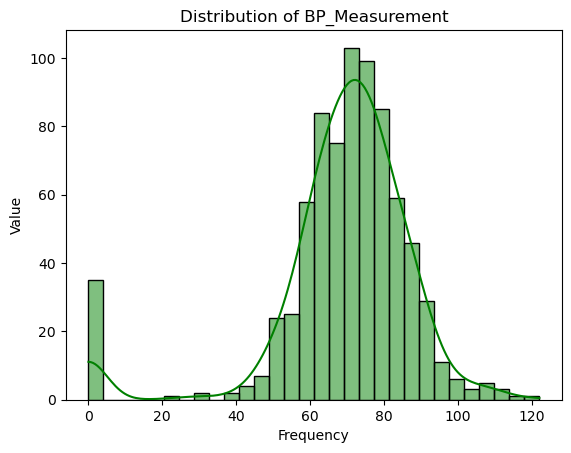

In [97]:
#call function - choose any column to visualize
plot_distribution(ds, 'Body_Mass_Index')
plot_distribution(ds, 'BP_Measurement')